In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *

In [7]:
path = Path("/storage/data/camvid_tiny")

In [8]:
path.ls()

(#3) [Path('/storage/data/camvid_tiny/labels'),Path('/storage/data/camvid_tiny/images'),Path('/storage/data/camvid_tiny/codes.txt')]

In [10]:
labels_path = path/"labels"

In [13]:
labels = labels_path.ls()

In [18]:
images = (path/"images").ls()
images

(#100) [Path('/storage/data/camvid_tiny/images/Seq05VD_f01080.png'),Path('/storage/data/camvid_tiny/images/0016E5_08400.png'),Path('/storage/data/camvid_tiny/images/0016E5_05310.png'),Path('/storage/data/camvid_tiny/images/0006R0_f03720.png'),Path('/storage/data/camvid_tiny/images/0006R0_f02910.png'),Path('/storage/data/camvid_tiny/images/Seq05VD_f04650.png'),Path('/storage/data/camvid_tiny/images/0001TP_008940.png'),Path('/storage/data/camvid_tiny/images/0016E5_08550.png'),Path('/storage/data/camvid_tiny/images/Seq05VD_f04980.png'),Path('/storage/data/camvid_tiny/images/Seq05VD_f00090.png')...]

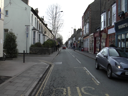

In [16]:
Image.open(images[0])

In [17]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter',
       'OtherMoving', 'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone', 'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [19]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [21]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = images, label_func = label_func, codes = codes
)

/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


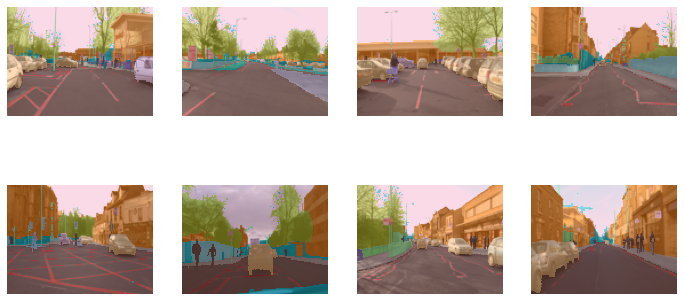

In [22]:
dls.show_batch()